In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from tensorflow.keras.datasets import fashion_mnist

In [18]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [19]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [20]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

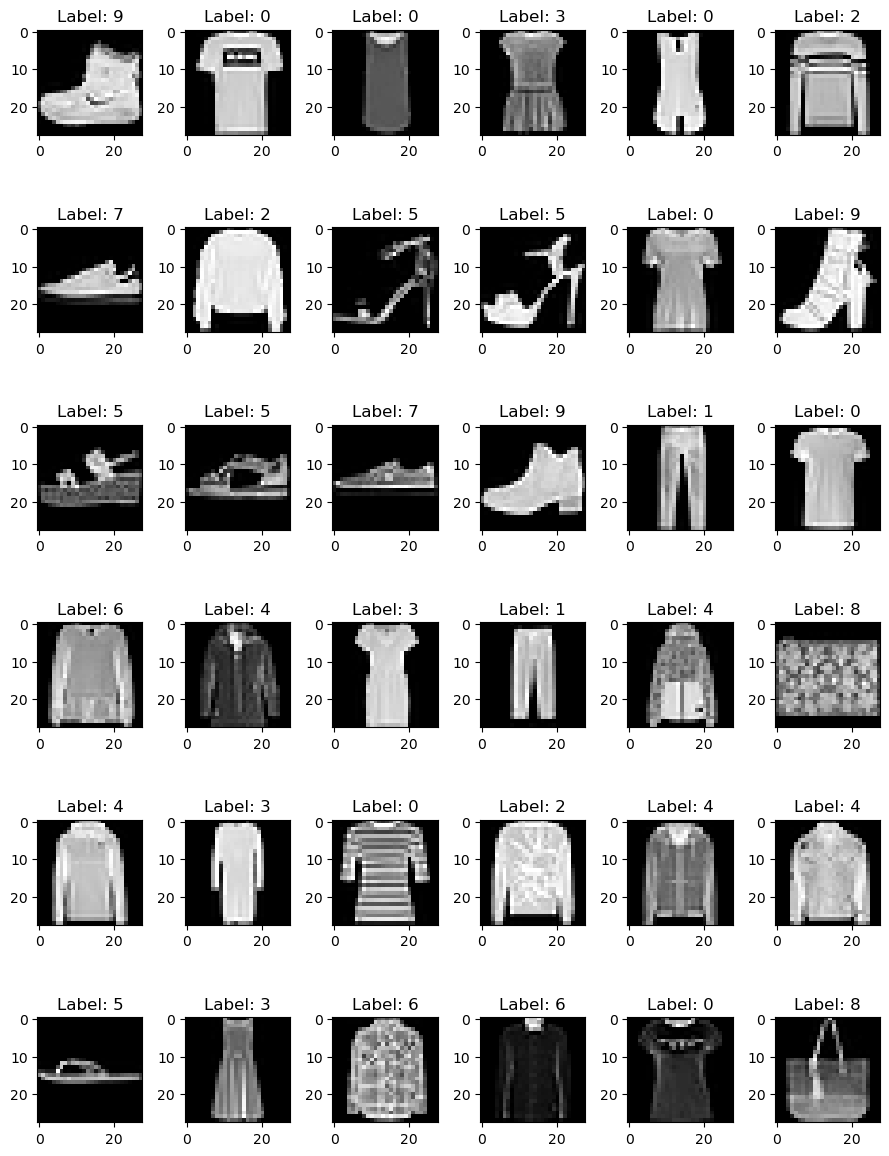

In [21]:
# specify the number of rows and columns you want to see
num_row = 6
num_col = 6

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [24]:
from sklearn.neural_network import MLPClassifier

In [33]:
X = X_train.reshape(60000,784)

y = Y_train
######################################## COMMENTED OUT ########################################
# clf = MLPClassifier(solver='adam', alpha=1e-1,
#                     hidden_layer_sizes=(15), random_state=1,max_iter = 5000)
# Increase Iteration to 5000 to get better accuracy, and increase hidden layer size to 15. Hiddent layer may or maynot increase accuracy only if data is complex.
#Increased the value of Alpha to 0.1 to get better accuracy, for better fitting
######################################## COMMENTED OUT ########################################

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


clf = MLPClassifier()
params={
    'random_state' : [1],
    'solver':['sgd'],
    'hidden_layer_sizes': [20],
    'max_iter': [5000],
    'alpha' : [0.1,0.5,0.8],
}
grid_pipe = GridSearchCV(clf,
                         param_grid=params,
                         cv=KFold(n_splits=5),
                         verbose=3)

grid_pipe.fit(X, y)
print(grid_pipe.best_params_)
print(grid_pipe.best_score_)

y_pred = grid_pipe.predict(X_test.reshape(10000,784))


#clf.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END alpha=0.1, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan total time=   0.0s
[CV 2/5] END alpha=0.1, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan total time=   0.0s
[CV 3/5] END alpha=0.1, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan total time=   0.0s
[CV 4/5] END alpha=0.1, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan total time=   0.0s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan total time=   0.0s
[CV 1/5] END alpha=0.5, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan total time=   0.0s
[CV 2/5] END alpha=0.5, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan total time=   0.0s
[CV 3/5] END alpha=0.5, hidden_layer_sizes=20, max_iter=5000, random_state=1, solver=sgm;, score=nan

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ar-na\miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ar-na\miniconda3\envs\ai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "c:\Users\ar-na\miniconda3\envs\ai\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ar-na\miniconda3\envs\ai\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'solver' parameter of MLPClassifier must be a str among {'sgd', 'lbfgs', 'adam'}. Got 'sgm' instead.


In [ ]:
# y_pred = clf.predict(X_test.reshape(10000,784))

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [ ]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(Y_test,y_pred,labels=np.unique(Y_test))
cm

array([[808,   3,  22,  32,   7,   3, 116,   0,   9,   0],
       [  4, 965,   1,  22,   3,   0,   4,   0,   1,   0],
       [ 12,   4, 773,  12, 124,   0,  73,   0,   2,   0],
       [ 25,  11,  18, 859,  46,   0,  37,   0,   4,   0],
       [  0,   1,  91,  21, 823,   0,  61,   0,   3,   0],
       [  0,   0,   0,   1,   0, 928,   0,  43,   1,  27],
       [138,   1,  98,  33,  82,   0, 637,   0,  11,   0],
       [  0,   0,   0,   0,   0,  15,   0, 958,   0,  27],
       [  5,   1,   9,  11,   7,   4,  12,   7, 943,   1],
       [  1,   0,   0,   0,   0,   5,   0,  46,   0, 948]], dtype=int64)

In [ ]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8642


In [ ]:
print(classification_report(Y_test,y_pred,labels=np.unique(Y_test),target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.76      0.77      0.77      1000
       Dress       0.87      0.86      0.86      1000
        Coat       0.75      0.82      0.79      1000
      Sandal       0.97      0.93      0.95      1000
       Shirt       0.68      0.64      0.66      1000
     Sneaker       0.91      0.96      0.93      1000
         Bag       0.97      0.94      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

